## Deep Learning Challenge

### Loading the CIFAR10 data
The data can be loaded directly from keras (`keras.datasets.cifar10`).

```python
cifar10 = keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
```

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as pyplot

In [2]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [3]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [4]:
label_list = list(np.unique(train_labels))
class_names = [
'airplanes',
'cars',
'birds',
'cats',
'deer',
'dogs',
'frogs',
'horses',
'ships',
'trucks']

In [5]:
label_dict = dict(zip(label_list, class_names))
label_dict

{0: 'airplanes',
 1: 'cars',
 2: 'birds',
 3: 'cats',
 4: 'deer',
 5: 'dogs',
 6: 'frogs',
 7: 'horses',
 8: 'ships',
 9: 'trucks'}

In [6]:
train_labels_plt = np.vectorize(label_dict.get)(train_labels)
test_labels_plt = np.vectorize(label_dict.get)(test_labels)

In [7]:
train_labels_plt

array([['frogs'],
       ['trucks'],
       ['trucks'],
       ...,
       ['trucks'],
       ['cars'],
       ['cars']], dtype='<U9')

In [8]:
index_list = []
for item in class_names:
    itemindex = np.where(train_labels_plt == item)
    index_list.append(itemindex[0][0])

In [9]:
index_list

[29, 4, 6, 9, 3, 27, 0, 7, 8, 1]

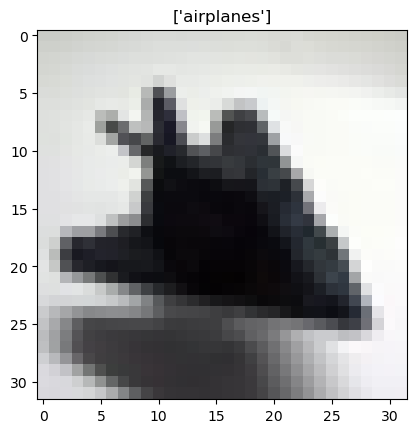

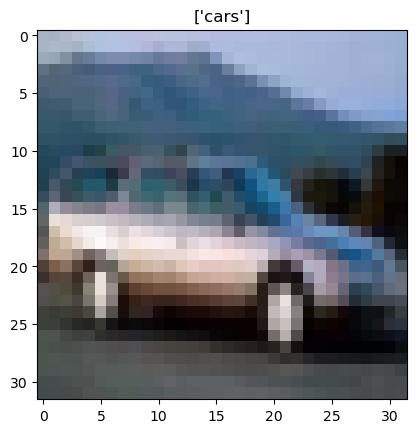

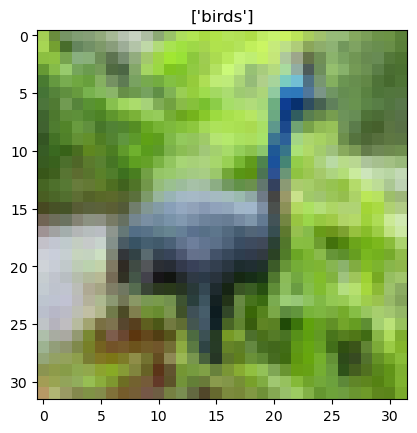

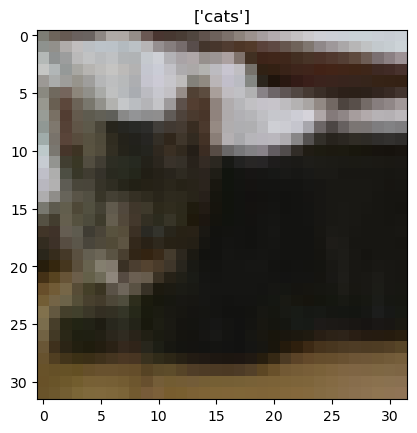

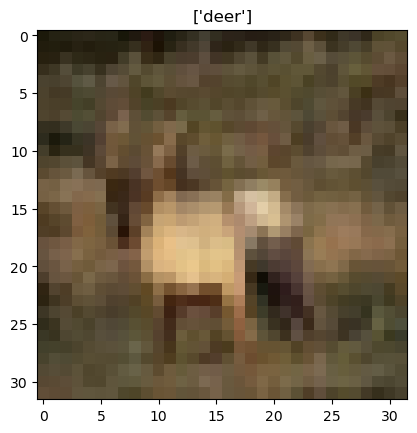

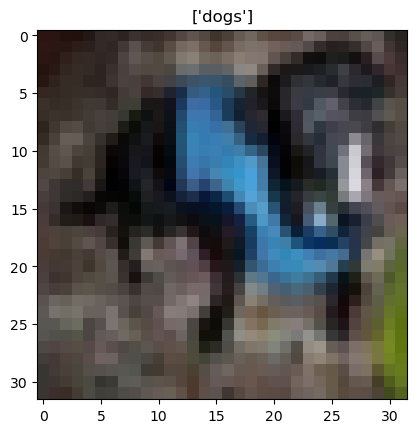

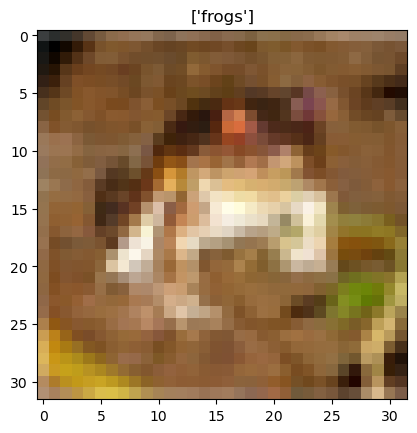

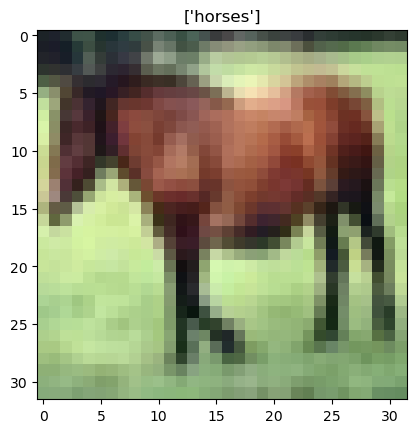

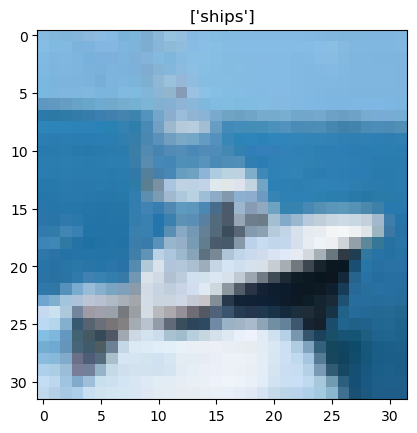

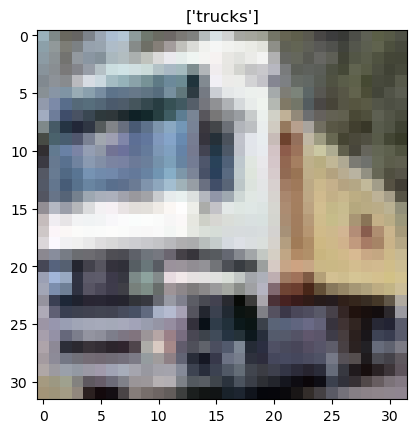

In [10]:
for i in index_list:
    plt.imshow(train_images[i])
    plt.title(train_labels_plt[i])
    plt.show()

In [11]:
# Normalize the data so that it is all within the same range. This way it will be easier for the neural network to compare different images.

# train_images = train_images.reshape((50000, 32 * 32 * 3))
train_images = train_images.astype('float32') / 255
# test_images = test_images.reshape((10000, 32 * 32 * 3))
test_images = test_images.astype('float32') / 255

In [12]:
train_images[0]

array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0

In [13]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [14]:
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

#### Task: Build a convulution neural network (CNN) to predict the object in the images. 

Try to do it on your own first before consulting with peers or tutorials on the internet. If you are stuck early, reach out to a mentor who will point you in the right direction.

In [42]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.optimizers import SGD

In [46]:
# Initialising the CNN
model = Sequential()

# Step 1 - Convolution
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))

# Step 2 - Pooling
model.add(MaxPooling2D((2, 2)))

# Repeat Convolution and Pooling
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

# Step 3 - Flattening
model.add(Flatten())

# Step 4 - Full connection
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

# Compiling the CNN
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [51]:
history = model.fit(x = train_images, y = train_labels,
                         epochs = 50,
                        batch_size = 64,
                         validation_data = (test_images, test_labels))

Epoch 1/50
782/782 [==============================] - 30s 38ms/step - loss: 0.4245 - accuracy: 0.8530 - val_loss: 0.9578 - val_accuracy: 0.7057
Epoch 2/50
782/782 [==============================] - 28s 36ms/step - loss: 0.3842 - accuracy: 0.8659 - val_loss: 0.9715 - val_accuracy: 0.7069
Epoch 3/50
782/782 [==============================] - 28s 36ms/step - loss: 0.3364 - accuracy: 0.8822 - val_loss: 1.0464 - val_accuracy: 0.7123
Epoch 4/50
782/782 [==============================] - 28s 36ms/step - loss: 0.3021 - accuracy: 0.8948 - val_loss: 1.0450 - val_accuracy: 0.7075
Epoch 5/50
782/782 [==============================] - 28s 36ms/step - loss: 0.2614 - accuracy: 0.9096 - val_loss: 1.2071 - val_accuracy: 0.6904
Epoch 6/50
782/782 [==============================] - 28s 35ms/step - loss: 0.2240 - accuracy: 0.9219 - val_loss: 1.1669 - val_accuracy: 0.7064
Epoch 7/50
782/782 [==============================] - 28s 35ms/step - loss: 0.1799 - accuracy: 0.9376 - val_loss: 1.2589 - val_accuracy:

In [54]:
# evaluate model
_, acc = model.evaluate(test_images, test_labels, verbose=0)
print('> %.3f' % (acc * 100.0))

> 73.180


In [60]:
def summarize_diagnostics(history):
	# plot loss
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
	# # save plot to file
	# filename = sys.argv[0].split('/')[-1]
	# pyplot.savefig(filename + '_plot.png')
	# pyplot.close()

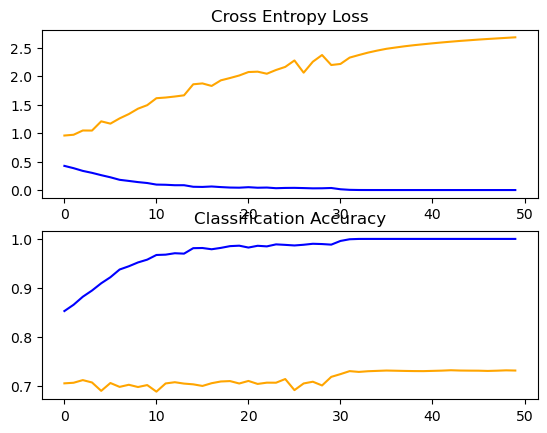

In [61]:
summarize_diagnostics(history)